# one-step delta learning rule
- best param found {'sticky_decay_rate': 0.02, 'pe_thresh': 1.0, 'init_lr': 0.25, 'lr_decay_rate': 0.05}

In [13]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from utils import *
import torch as tr

# scratch

In [31]:
rnn = RNNSch()
rnn([0,1,4,5])

tensor([[[-0.3201, -0.3486, -0.2256,  0.1327,  0.7239,  0.1023, -0.0572,
           0.5125,  0.2364,  0.6668]],

        [[-0.2328, -0.3107, -0.1501,  0.0724,  0.6746,  0.1242,  0.0253,
           0.4385,  0.2091,  0.5614]],

        [[-0.2634, -0.2278, -0.2130,  0.1329,  0.3817,  0.0054, -0.0541,
           0.2614,  0.2263,  0.4331]],

        [[-0.1424, -0.2228, -0.2811, -0.0225,  0.4775,  0.2999, -0.0348,
           0.4608,  0.3202,  0.4658]]], grad_fn=<UnsafeViewBackward>)

# main

In [3]:
nsubs = 20
task = Task()
ntr,nte = 160,40
accL = [[],[]]
peL = []
nschL = []

for ci,cond in enumerate(['blocked','interleaved']):
  for s in range(nsubs):
    ag = Agent()
    exp,cur = task.generate_experiment(cond,ntr,nte)
    acc = ag.forward_exp(exp) 
    accL[ci].append(acc)

acc = np.array(accL)
acc.shape # cond,subs,trials,tstep

(2, 20, 200, 5)

# diagnostic plots

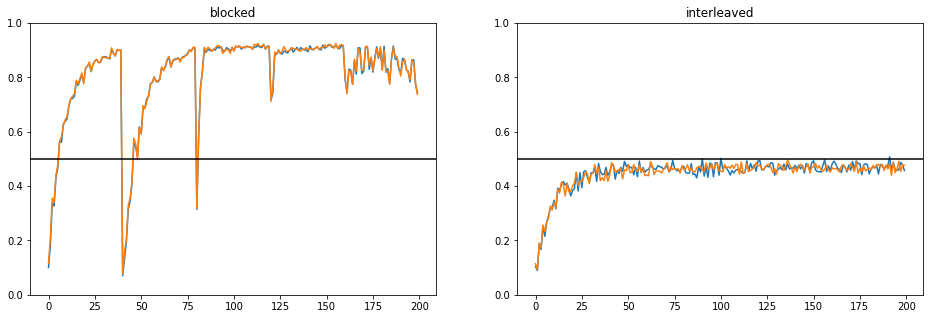

In [4]:
f,axar=plt.subplots(1,2,figsize=(16,5))
plt_tsteps = (2,3)
for i in range(2):
  axar[i].set_title(['blocked','interleaved'][i])
  Mac = acc[i].mean(0)
  axar[i].plot(Mac[:,plt_tsteps])
  axar[i].set_ylim(0,1)
  axar[i].axhline(0.5,c='k')


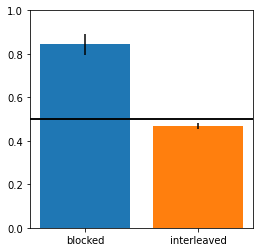

In [5]:
f,axar=plt.subplots(1,1,figsize=(4,4))
plt_tsteps = (2,3)
for i in range(2):
  Mac = acc[i].mean(0)
  Sac = acc[i].std(0)/np.sqrt(len(acc[i]))
  axar.set_ylim(0,1)
  axar.axhline(0.5,c='k')
  axar.bar(i,Mac[-40:,plt_tsteps].mean(),yerr=Sac[-40:,plt_tsteps].mean())
  axar.set_xticks([0,1])
  axar.set_xticklabels(['blocked','interleaved'])